# Getting started with pymccrgb

This notebook shows an example of classifying a point cloud from a photogrammetric survey. 

It uses the `read_las` and `write_las` functions for I/O and shows how to use `mcc_rgb` to classify points.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import matplotlib.pyplot as plt

In [3]:
from pymccrgb import mcc_rgb
from pymccrgb.plotting import plot_points_3d
from pymccrgb.ioutils import read_las, write_las

First, we load a dataset. In this case, it's a point cloud produced from unmanned aerial vehicle (UAV) photography. The whole dataset is over 600K points, but let's use the `nrows` argument to read a subset of the data.

In [4]:
data = read_las('data/uav.las', nrows=2.5e5)

In [5]:
print(data.shape)

(250000, 6)


We loaded 250K points with three color channels.

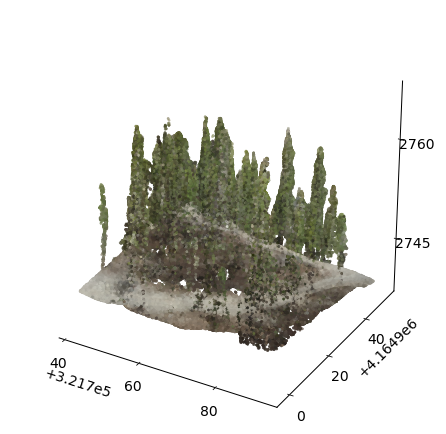

In [6]:
plot_points_3d(data)

We can use the MCC-RGB algorithm (`mcc-rgb`) to classify the points by relative height and color.

In this example, let's use a training height of 1 meter to capture canopy points. The algorithm will use points above 1 m relative height to train a non-ground classifier.

In [7]:
ground, labels = mcc_rgb(data,
                         scales=[0.5, 1.0, 1.5],  # Scale domains (interpolation spacing)
                         tols=[1.0, 1.0, 1.0],    # Height tolerances
                         training_tols=[1.0],     # MCC-RGB training height
                         verbose=True)

--------------------
MCC step
--------------------
Scale: 0.50, Relative height: 1.0e+00, iter: 0
Removed 88342 nonground points (35.45 %)
--------------------
Classification update step
--------------------
Scale: 0.50, Relative height: 1.0e+00
Removed 47155 nonground points (18.92 %)
--------------------
MCC step
--------------------
Scale: 0.50, Relative height: 1.0e+00, iter: 1
Removed 5961 nonground points (2.39 %)
--------------------
MCC step
--------------------
Scale: 0.50, Relative height: 1.0e+00, iter: 2
Removed 1443 nonground points (0.58 %)
--------------------
MCC step
--------------------
Scale: 1.00, Relative height: 1.0e+00, iter: 0
Removed 1106 nonground points (0.44 %)
--------------------
MCC step
--------------------
Scale: 1.00, Relative height: 1.0e+00, iter: 1
Removed 298 nonground points (0.12 %)
--------------------
MCC step
--------------------
Scale: 1.00, Relative height: 1.0e+00, iter: 2
Removed 103 nonground points (0.04 %)
--------------------
MCC step


We can plot the ground and non-ground points with a plotting function.

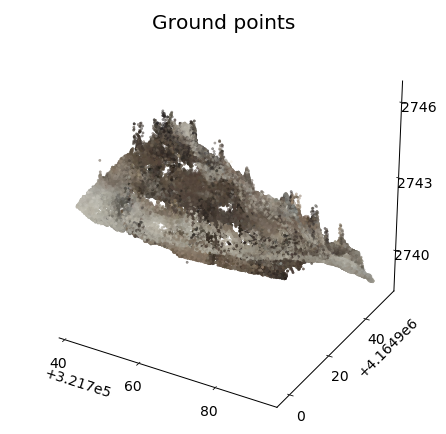

In [8]:
plot_points_3d(ground)
_ = plt.gca().set_title('Ground points')

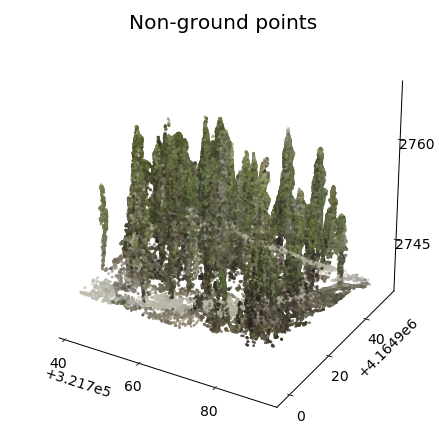

In [9]:
plot_points_3d(data[labels == 0, :])
_ = plt.gca().set_title('Non-ground points')

In [10]:
nground = (labels == 1).sum()
nnonground = (labels == 0).sum()
print(f"Classified {nground} ground points and {nnonground} non-ground points")

Classified 104233 ground points and 145767 non-ground poitns


Finally, you can save the output as a LAS file with `write_las` (or use `numpy.save`).

In [11]:
write_las(ground, 'data/uav_ground.las')